In [1]:
from google.colab import files
upload = files.upload()

Saving occupancy_detection.csv to occupancy_detection.csv


In [2]:
#Preprocessing Steps
import pandas as pd
df = pd.read_csv('occupancy_detection.csv')
print(df.head())
df.columns = df.columns.str.strip().str.lower()


         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  22-12-2017  10:49:41    24.94    24.75    24.56    25.38       121   
1  22-12-2017  10:50:12    24.94    24.75    24.56    25.44       121   
2  22-12-2017  10:50:42    25.00    24.75    24.50    25.44       121   
3  22-12-2017  10:51:13    25.00    24.75    24.56    25.44       121   
4  22-12-2017  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0       

In [3]:
#Identifying Missing Values
print(df.isnull().sum())


date                    0
time                    0
s1_temp                 0
s2_temp                 0
s3_temp                 0
s4_temp                 0
s1_light                0
s2_light                0
s3_light                0
s4_light                0
s1_sound                0
s2_sound                0
s3_sound                0
s4_sound                0
s5_co2                  0
s5_co2_slope            0
s6_pir                  0
s7_pir                  0
room_occupancy_count    0
dtype: int64


In [4]:
#Summary Statistics
print(df.describe(include='all'))


              date      time       s1_temp       s2_temp       s3_temp  \
count        10129     10129  10129.000000  10129.000000  10129.000000   
unique           7     10129           NaN           NaN           NaN   
top     23-12-2017  09:00:09           NaN           NaN           NaN   
freq          2779         1           NaN           NaN           NaN   
mean           NaN       NaN     25.454012     25.546059     25.056621   
std            NaN       NaN      0.351351      0.586325      0.427283   
min            NaN       NaN     24.940000     24.750000     24.440000   
25%            NaN       NaN     25.190000     25.190000     24.690000   
50%            NaN       NaN     25.380000     25.380000     24.940000   
75%            NaN       NaN     25.630000     25.630000     25.380000   
max            NaN       NaN     26.380000     29.000000     26.190000   

             s4_temp      s1_light     s2_light      s3_light      s4_light  \
count   10129.000000  10129.0000

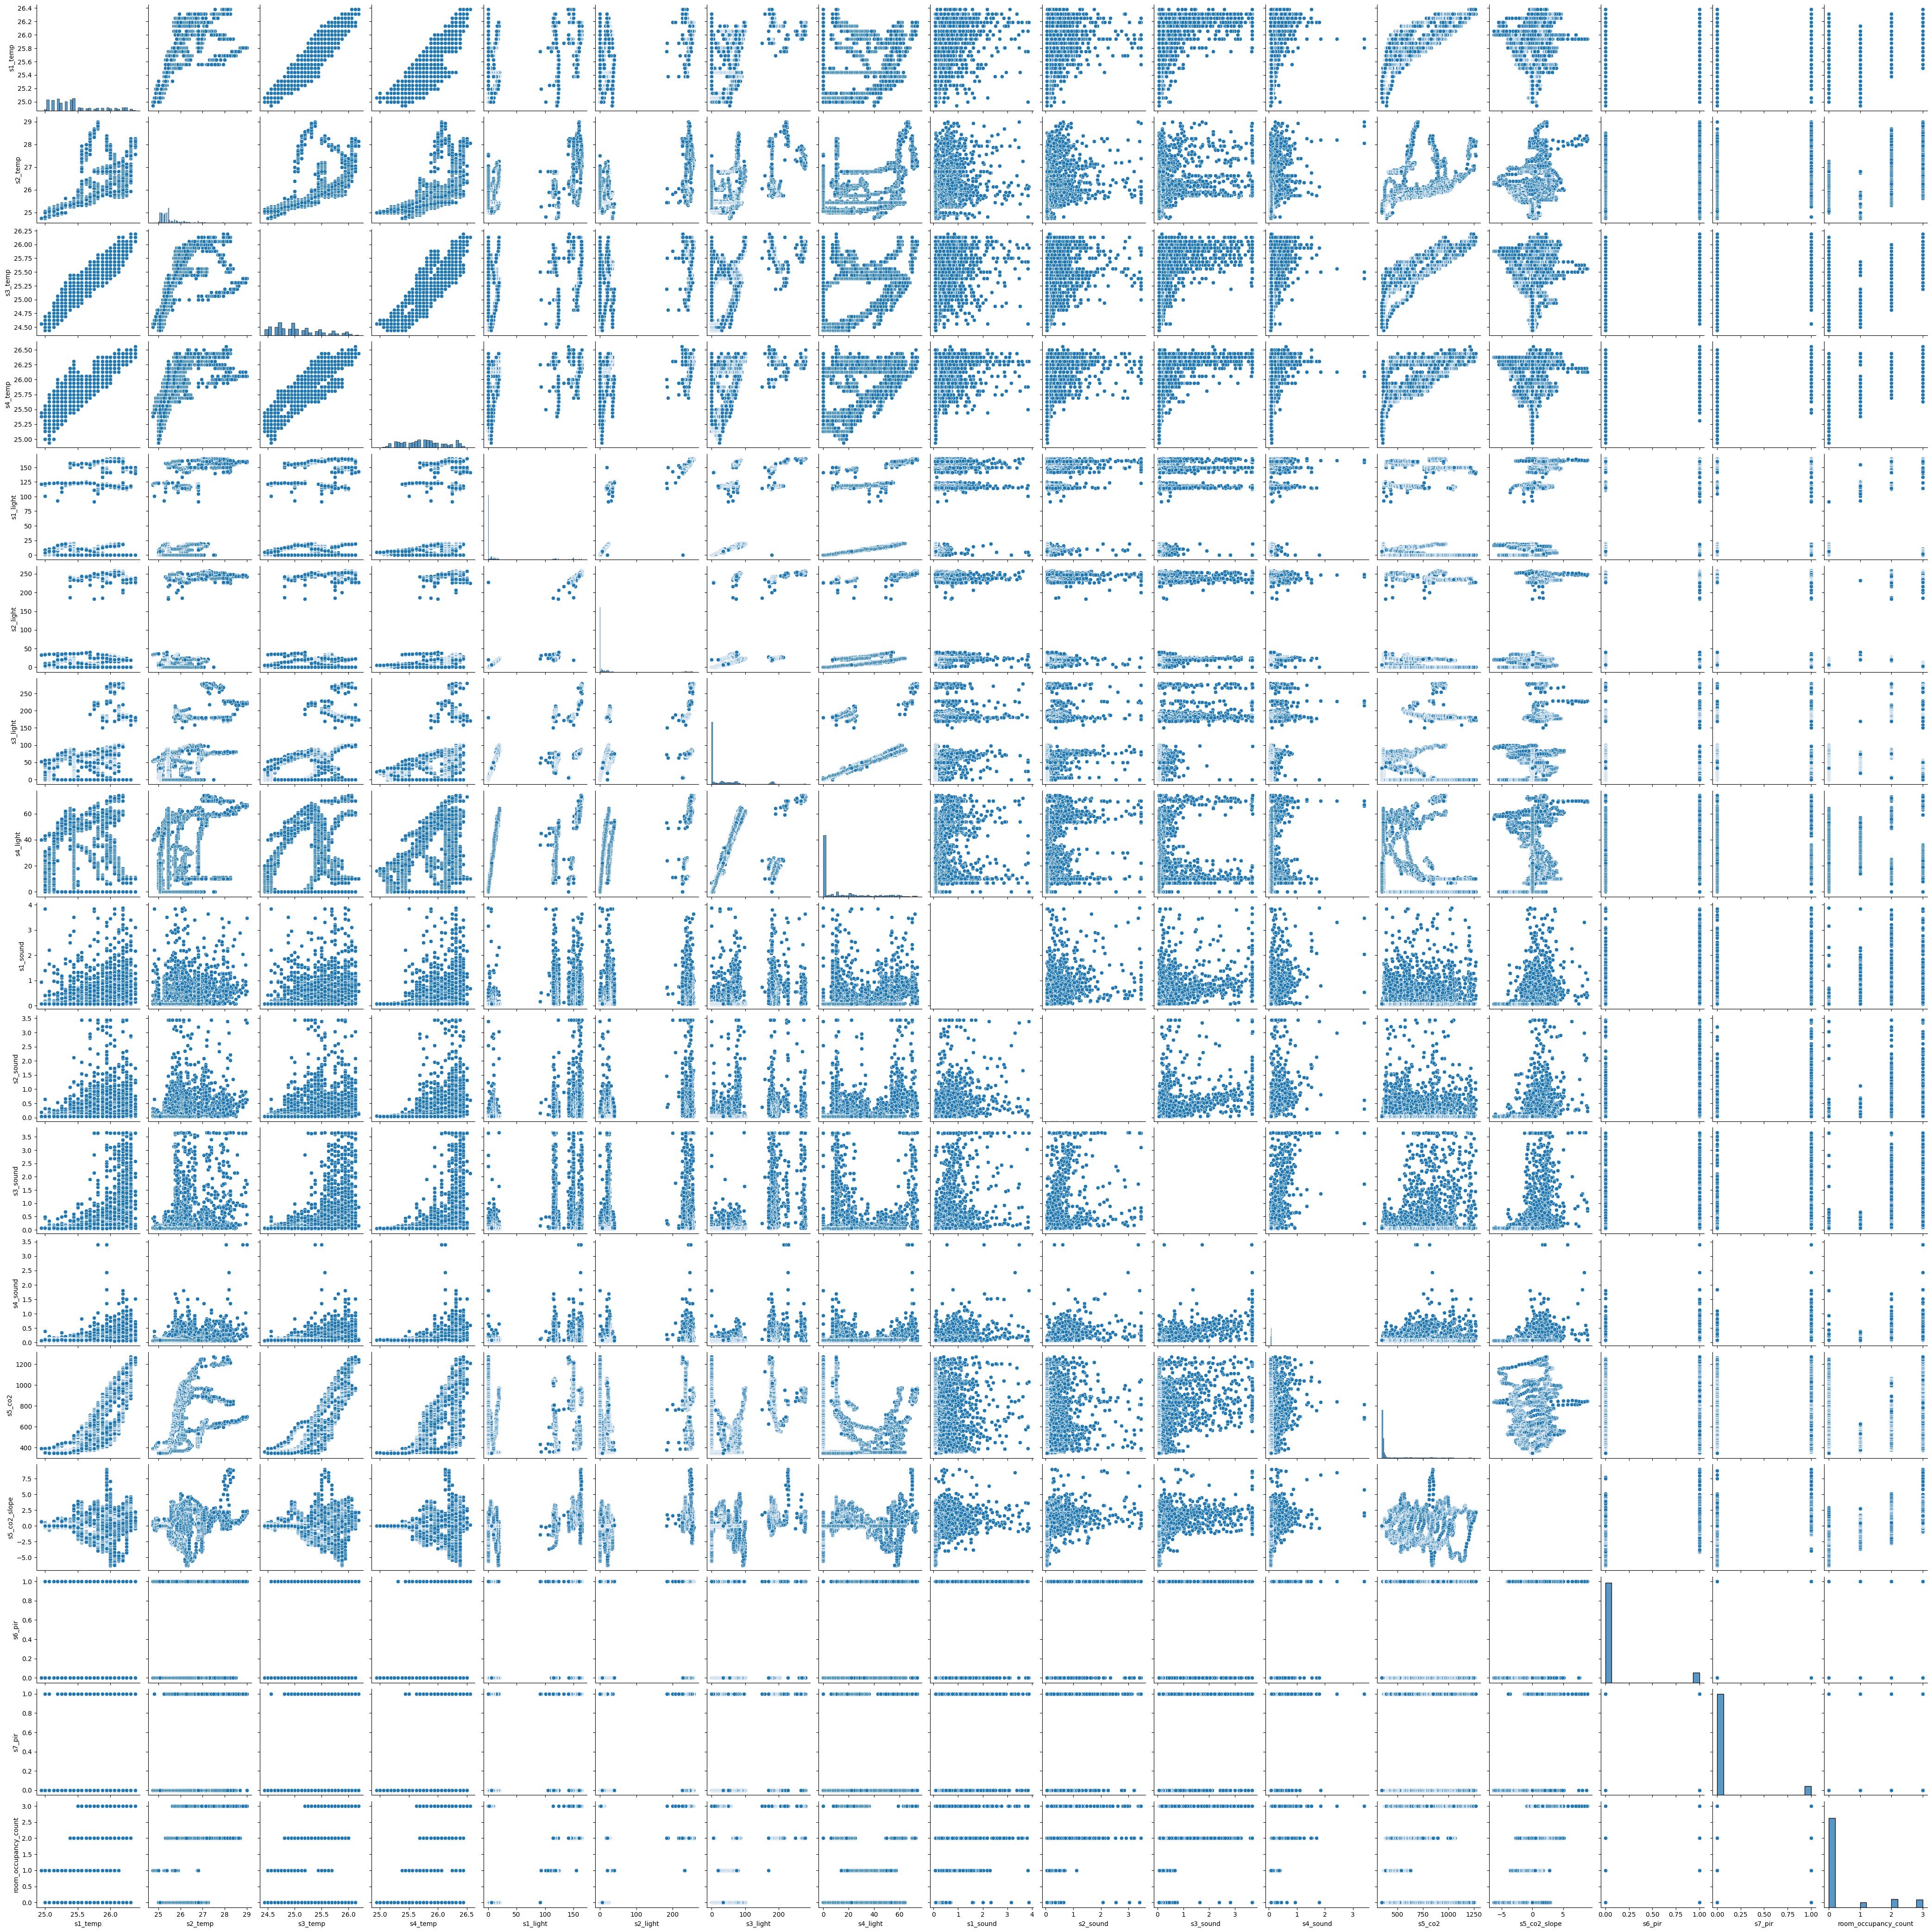

In [5]:
#Visualization of Relationships
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()


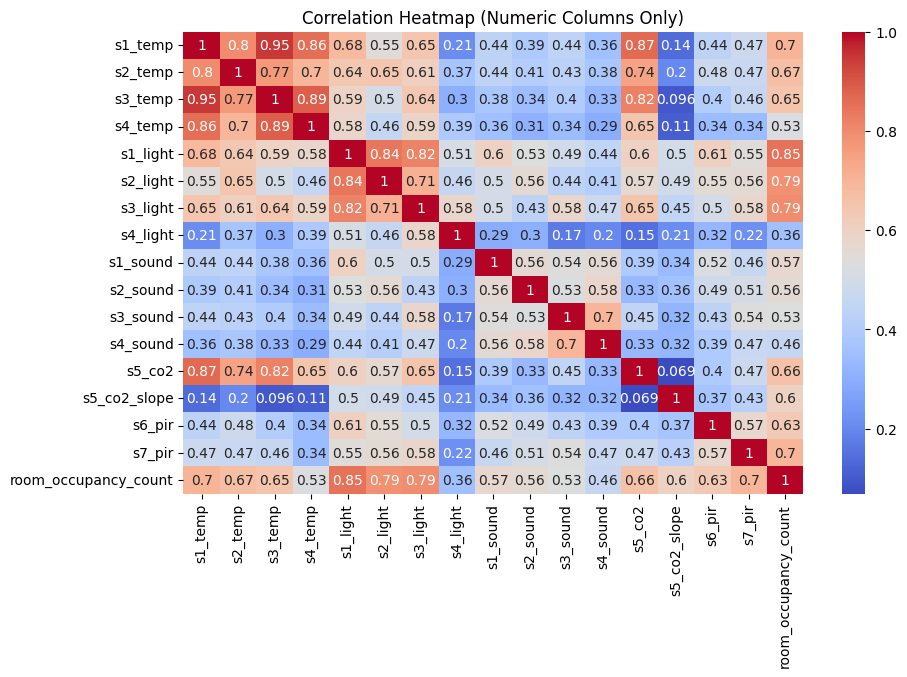

In [7]:
#Correlation Analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


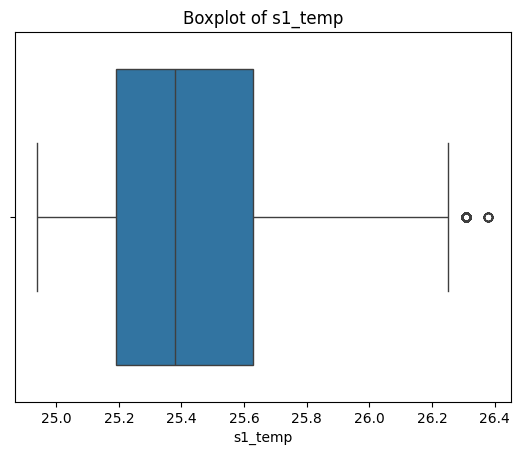

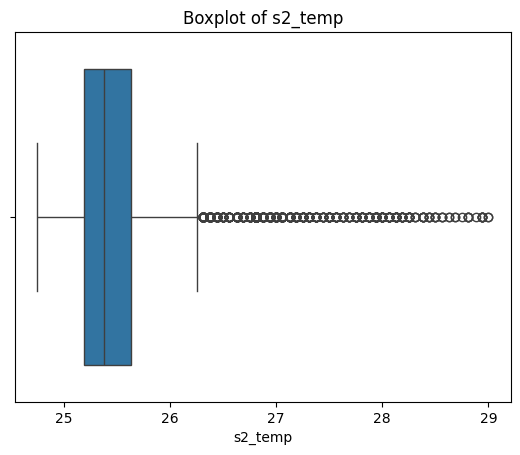

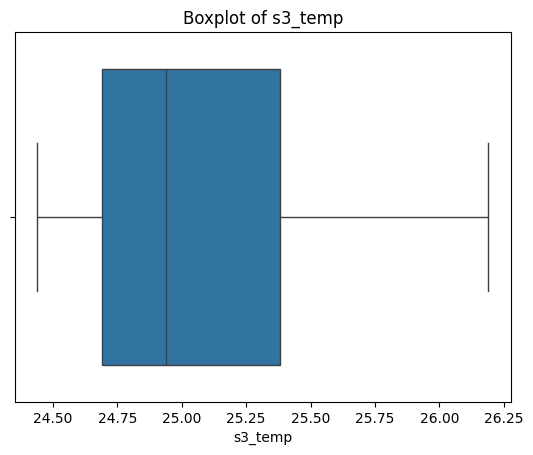

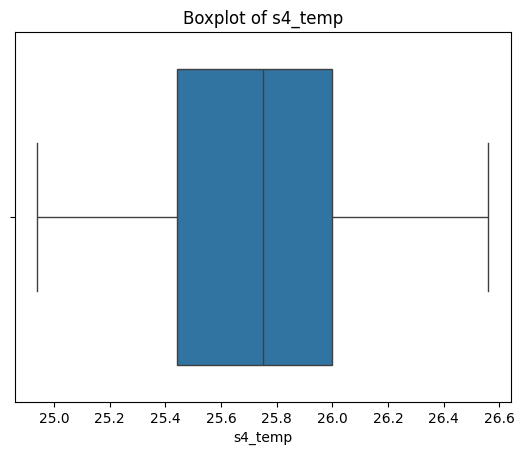

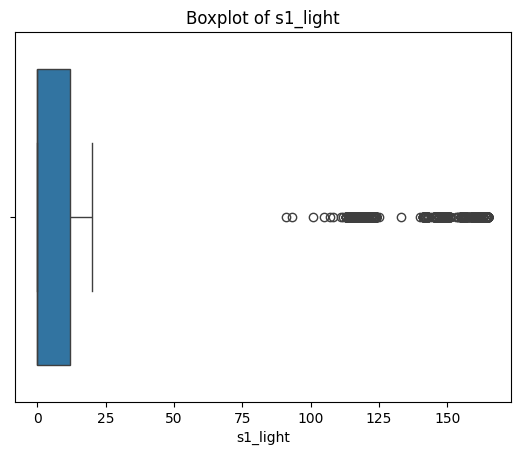

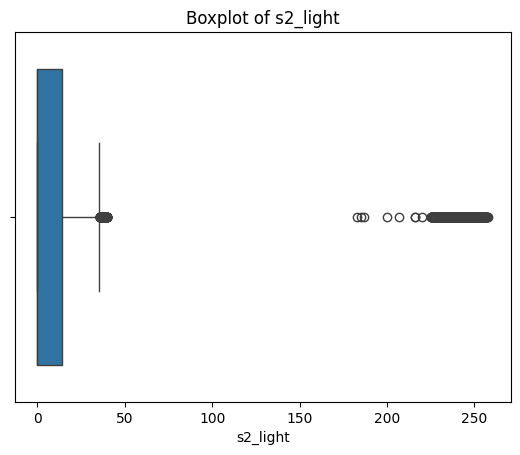

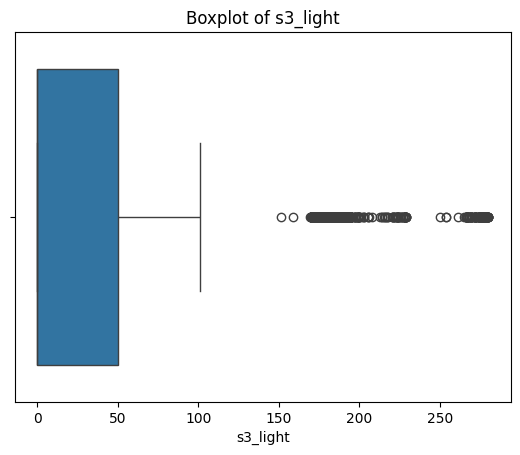

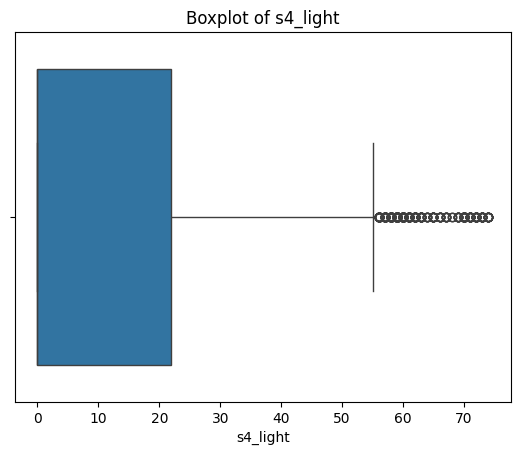

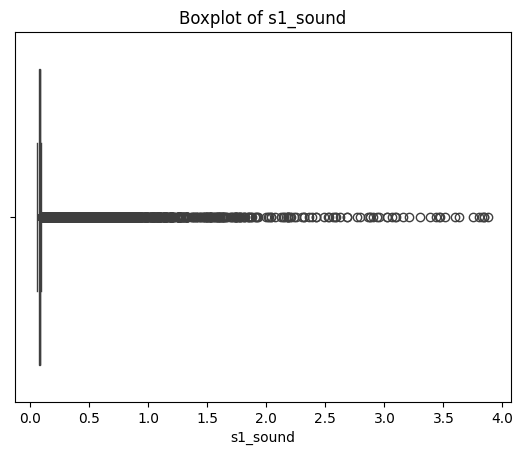

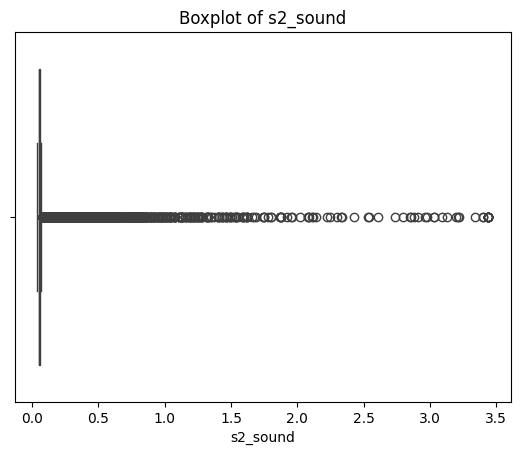

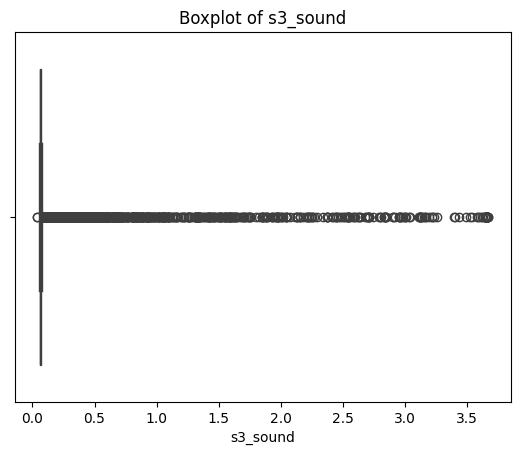

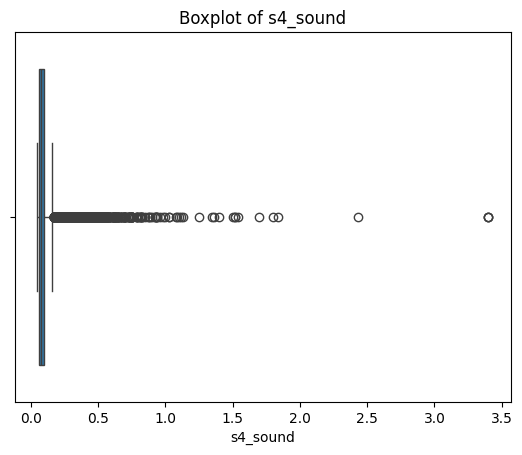

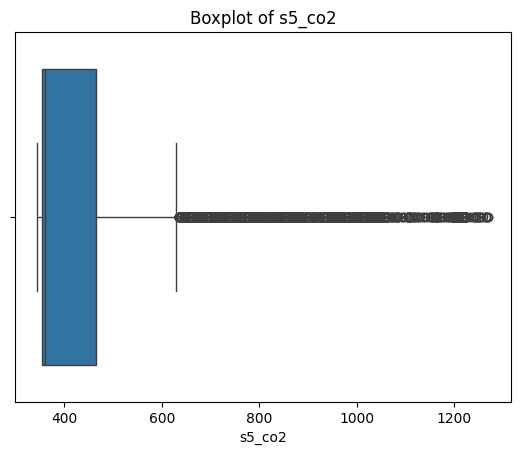

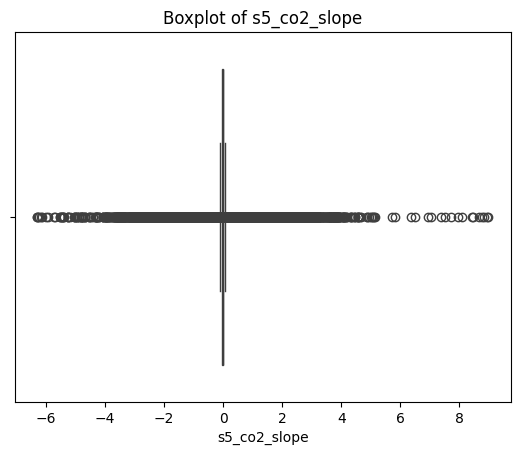

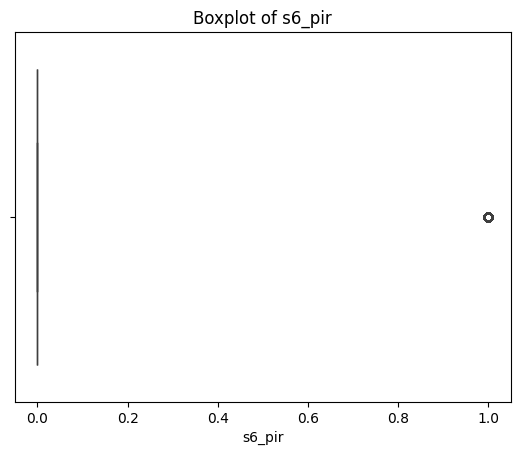

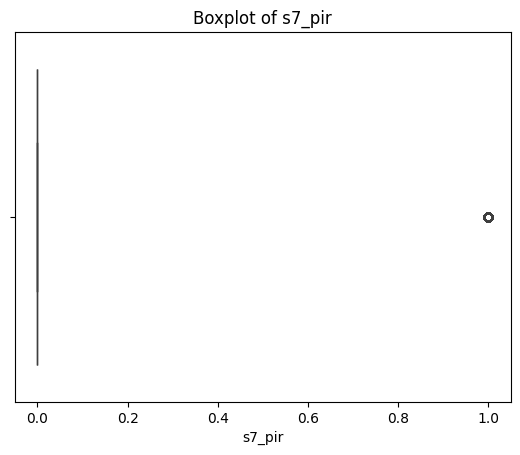

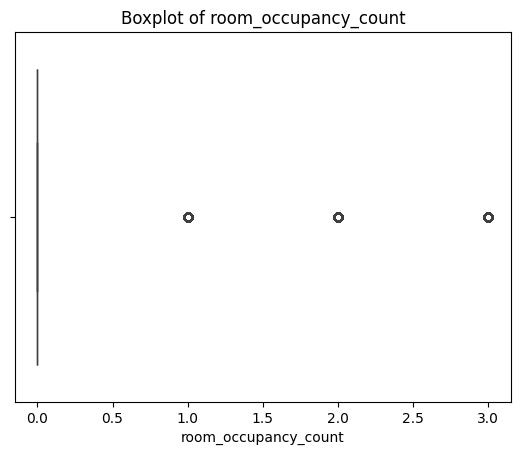

In [14]:
#Outliers Detection and Visualization
for column in df.select_dtypes(include=['float64', 'int64']):
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [18]:
#Part B: Model Building
# Converting invoicedate (if exists) to separate column
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
print(df[['year', 'month', 'day', 'hour']].head())




   year  month  day  hour
0  2017     12   22     0
1  2017     12   22     0
2  2017     12   22     0
3  2017     12   22     0
4  2017     12   22     0


Columns in DataFrame: ['date', 'time', 's1_temp', 's2_temp', 's3_temp', 's4_temp', 's1_light', 's2_light', 's3_light', 's4_light', 's1_sound', 's2_sound', 's3_sound', 's4_sound', 's5_co2', 's5_co2_slope', 's6_pir', 's7_pir', 'room_occupancy_count', 'year', 'month', 'day', 'hour']


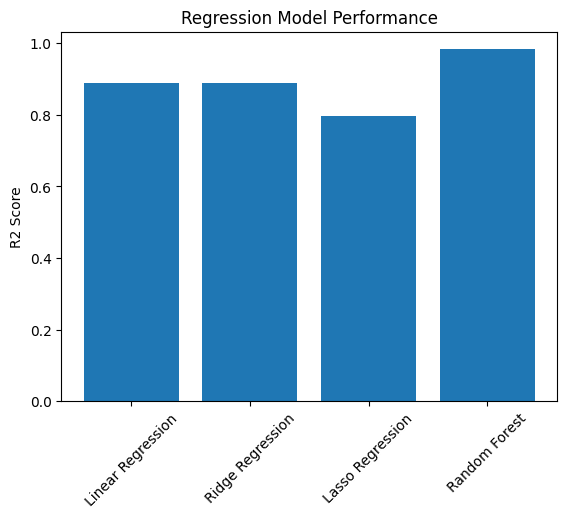

In [45]:
#Regression Models
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Check available columns in your DataFrame (Debugging Step)
print("Columns in DataFrame:", df.columns.tolist())

# Set target and features
if 'room_occupancy_count' in df.columns:
    X = df.drop(['room_occupancy_count', 'date', 'time'], axis=1, errors='ignore')  # Drop target + non-numeric columns
    y = df['room_occupancy_count']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Random Forest": RandomForestRegressor()
    }

    # Train and evaluate models
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        results[name] = r2_score(y_test, preds)

    # Bar plot of model performance
    plt.bar(results.keys(), results.values())
    plt.ylabel("R2 Score")
    plt.title("Regression Model Performance")
    plt.xticks(rotation=45)
    plt.show()




Logistic Regression
Accuracy: 0.9944060546232313
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2451
           1       1.00      1.00      1.00       148
           2       0.98      0.97      0.97       244
           3       0.95      0.96      0.96       196

    accuracy                           0.99      3039
   macro avg       0.98      0.98      0.98      3039
weighted avg       0.99      0.99      0.99      3039


Decision Tree
Accuracy: 0.9976966107272129
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2451
           1       0.99      1.00      1.00       148
           2       1.00      0.99      0.99       244
           3       0.99      0.97      0.98       196

    accuracy                           1.00      3039
   macro avg       1.00      0.99      0.99      3039
weighted avg       1.00      1.00      1.00      3039


Random Forest
Accuracy: 0.998354721

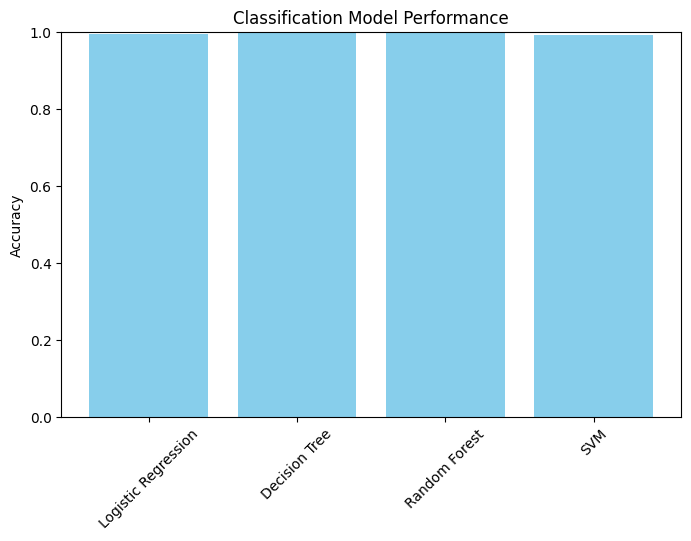

In [46]:
#Applying Classification Models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
df.columns = df.columns.str.strip().str.lower()
df = df.drop(['date', 'time'], axis=1)
X = df.drop('room_occupancy_count', axis=1)
y = df['room_occupancy_count']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Classification Model Performance')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


In [47]:
# Conclusion
print("Regression Results (R2 Scores):")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

print("\nClassification Results (Accuracy):")
for model, acc in acc_results.items():
    print(f"{model}: {acc:.4f}")


Regression Results (R2 Scores):
Linear Regression: 0.8880
Ridge Regression: 0.8879
Lasso Regression: 0.7959
Random Forest: 0.9831

Classification Results (Accuracy):
